In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True, cache_dir='.')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/3857059749_fe8ca621a9.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3419176626_512811d3ff.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7015947703_11b30c20c9_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4558562689_c8e2ab9f10.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8978962053_0727b41d26.jpg')]

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
daisy=list(data_dir.glob('daisy/*'))
len(daisy)

633

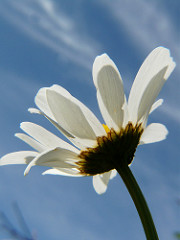

In [7]:
PIL.Image.open(str(daisy[2]))

In [8]:
# We will create a dictionary

In [9]:
flower_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
}

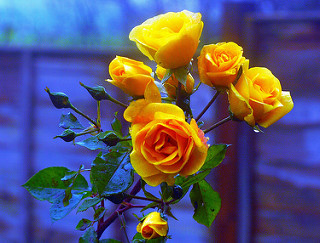

In [10]:
PIL.Image.open(str(flower_dict['roses'][3]))

In [11]:
flower_labels={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'tulips':3,
    'sunflowers':4,
}

In [12]:
img = cv2.imread(str(flower_dict['roses'][3]))

In [13]:
img.shape

(243, 320, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y=[], []
for flower_name, flowers in flower_dict.items():
  for image in flowers:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_labels[flower_name])

In [16]:
X

[array([[[144, 174, 167],
         [132, 171, 170],
         [122, 166, 169],
         ...,
         [  0,   0,  43],
         [  3,   1,  49],
         [  5,   0,  63]],
 
        [[132, 174, 170],
         [124, 163, 161],
         [ 95, 149, 147],
         ...,
         [  0,   0,  55],
         [  6,   0,  63],
         [ 11,   0,  78]],
 
        [[117, 162, 162],
         [ 96, 147, 143],
         [ 89, 139, 136],
         ...,
         [  9,   0,  66],
         [  6,   0,  75],
         [ 13,   0,  90]],
 
        ...,
 
        [[103, 121, 131],
         [121, 190, 213],
         [166, 189, 206],
         ...,
         [192, 165, 178],
         [204, 177, 191],
         [205, 178, 192]],
 
        [[111, 125, 133],
         [114, 178, 208],
         [161, 187, 202],
         ...,
         [208, 180, 194],
         [209, 175, 188],
         [197, 161, 171]],
 
        [[119, 132, 138],
         [117, 173, 207],
         [153, 183, 195],
         ...,
         [215, 181, 191],
  

In [17]:
X=np.array(X)
y=np.array(y)

In [18]:
y.shape

(3670,)

In [19]:
X.shape

(3670, 180, 180, 3)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [22]:
X_train_scaled

array([[[[0.12941176, 0.39607843, 0.27843137],
         [0.09411765, 0.36862745, 0.24705882],
         [0.05882353, 0.33333333, 0.21176471],
         ...,
         [0.        , 0.06666667, 0.01568627],
         [0.00392157, 0.0627451 , 0.01960784],
         [0.00784314, 0.0745098 , 0.        ]],

        [[0.1254902 , 0.38823529, 0.27058824],
         [0.09803922, 0.37647059, 0.25098039],
         [0.07058824, 0.34509804, 0.21960784],
         ...,
         [0.        , 0.10196078, 0.03921569],
         [0.        , 0.05490196, 0.00784314],
         [0.00784314, 0.05490196, 0.        ]],

        [[0.11372549, 0.36078431, 0.24313725],
         [0.10588235, 0.37647059, 0.24705882],
         [0.0745098 , 0.34901961, 0.22352941],
         ...,
         [0.00784314, 0.13333333, 0.0627451 ],
         [0.00392157, 0.05098039, 0.00784314],
         [0.01176471, 0.05882353, 0.        ]],

        ...,

        [[0.        , 0.04313725, 0.01568627],
         [0.02352941, 0.10588235, 0.0627451 ]

In [26]:
model = keras.Sequential([
    layers.Conv2D(18, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(30, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(69, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3573 - loss: 1.4488
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6251 - loss: 0.9825
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7303 - loss: 0.7457
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8051 - loss: 0.5409
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8922 - loss: 0.3327
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9456 - loss: 0.1862
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9824 - loss: 0.0760
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9794 - loss: 0.0757
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9806 - loss: 0.0654
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9708 - loss: 0.0920


In [27]:
model.evaluate(X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6583 - loss: 1.9466


[1.8790892362594604, 0.656862735748291]

In [32]:
predictions=model.predict(X_test_scaled)
score=tf.nn.softmax(predictions[3])
score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.21413982, 0.28791776, 0.2812763 , 0.10974557, 0.10692059],
      dtype=float32)>

In [33]:
np.argmax(score)

1

In [34]:
y_test[0]

0

In [36]:
# the accuracy is pretty low which is an example of overfitting
# We will reduce this using data augmentation
from tensorflow import keras
from tensorflow.keras import layers

# Create a data augmentation layer
data_aug = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# You can use this data augmentation pipeline in your model training


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


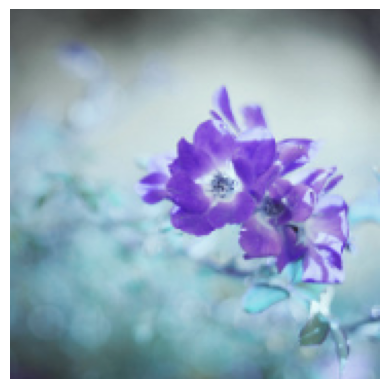

In [42]:
plt.axis('off')
plt.imshow(X[1])

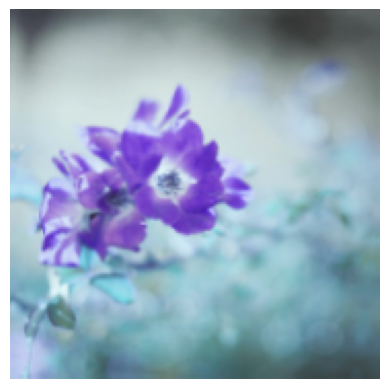

In [43]:
plt.axis('off')
plt.imshow(data_aug(X)[1].numpy().astype("uint8"))

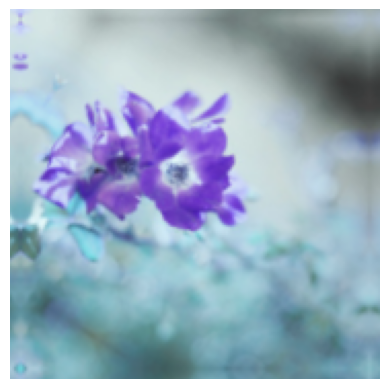

In [44]:
plt.axis('off')
plt.imshow(data_aug(X)[1].numpy().astype("uint8"))

In [45]:
model = keras.Sequential([
    data_aug,
    layers.Conv2D(18, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(30, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(69, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.18),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.2920 - loss: 1.6533
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5419 - loss: 1.1624
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5819 - loss: 1.0652
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6183 - loss: 0.9735
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6722 - loss: 0.8704
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7083 - loss: 0.8010
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7009 - loss: 0.7758
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7254 - loss: 0.7436
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7438 - loss: 0.6889
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7545 - loss: 0.6488
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7712 - loss: 0.6479
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7636 - l

In [46]:
model.evaluate(X_test_scaled, y_test)

 1/29 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.6250 - loss: 1.0814

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7518 - loss: 0.7642


[0.7086628675460815, 0.7690631747245789]

In [ ]:
# The accuracy has increased as overfitting has been reduced